# IAST examples

In this notebook we'll attempt to model isotherms using the included models. First, make sure the data is imported by running the import notebook.

In [1]:
%run import.ipynb
import matplotlib.pyplot as plt
import numpy

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric heat calculation


## Using models

The usual way of using the IAST calculation is by fitting a model to the isotherm, then running the calculations on the obtained model. Let's first fit the Langmuir model to both isotherms.

In [2]:
isotherms_iast_models = []

isotherm = next(i for i in isotherms_iast if i.material_name=='MOF-5(Zn)')
print('Isotherm sample:', isotherm.material_name)

for isotherm in isotherms_iast:
    model = pygaps.ModelIsotherm.from_pointisotherm(isotherm, model='Langmuir')
    isotherms_iast_models.append(model)

Isotherm sample: MOF-5(Zn)


Now we can do the IAST calculation.

In [3]:
pygaps.iast([isotherms_iast_models[0], isotherms_iast_models[1]],
                partial_pressures=[10, 5], verbose=True)

2 components.
	Partial pressure component 0 = 10.000000
	Partial pressure component 1 = 5.000000
Component  0
	p =  10
	p^0 =  10.754156612732602
	Loading:  14.7220542081815
	x =  0.9298730119068842
	Spreading pressure =  [27.12083964]
Component  1
	p =  5
	p^0 =  71.29922638857548
	Loading:  1.1102734534107905
	x =  0.0701269880931158
	Spreading pressure =  [27.12083964]


array([14.72205421,  1.11027345])

Alternatively, if we are interested in binary adorption behaviour, we can use the extension functions `iast_binary_svp` and `iast_binary_vle` to obtain how the selectivity changes based on pressure in a constant composition or, respectively, how the gas phase-adsorbed phase changes with gas composition, at constant pressure. 

These functions perform the IAST calculation at every point in the range passed and can plot the results.

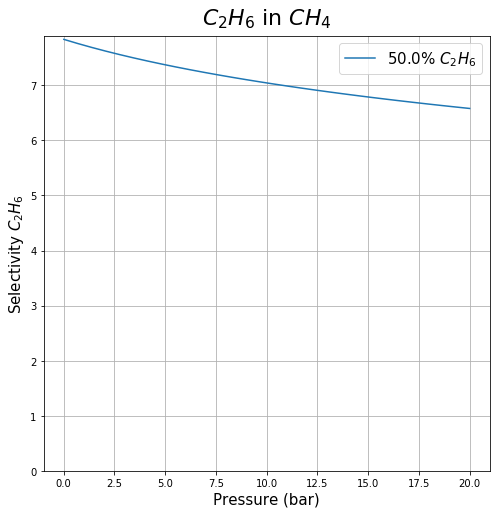

In [4]:
partial_pressures = [0.5, 0.5]
pressure_range = numpy.linspace(0.01, 20, 30)

result_dict = pygaps.iast_binary_svp([isotherms_iast_models[0], isotherms_iast_models[1]],
                                    partial_pressures,
                                    pressure_range,
                                    verbose=True,
                                    )
plt.show()

And for the adsorbed phase - gas phase equilibrium:

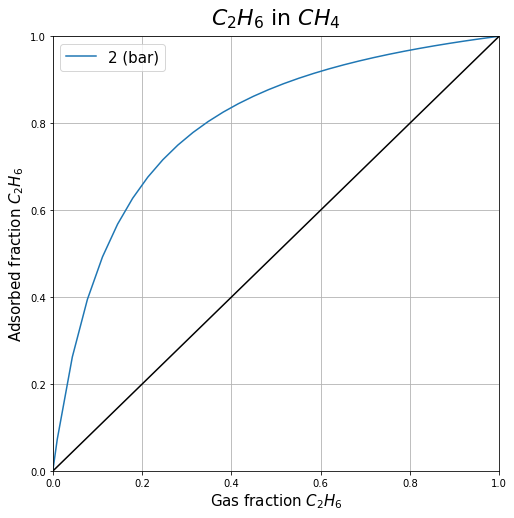

In [5]:
result_dict = pygaps.iast_binary_vle([isotherms_iast_models[0], 
                                      isotherms_iast_models[1]], 
                                     2, verbose=True)

plt.show()

## Using isotherms directly - interpolation

The isotherms themselves can be used directly. However, instead of spreading pressure being calculated from the model, it will be approximated through interpolation.

In [6]:
pygaps.iast([isotherms_iast[0], isotherms_iast[1]],
                partial_pressures=[10, 5], verbose=True)

2 components.
	Partial pressure component 0 = 10.000000
	Partial pressure component 1 = 5.000000
Component  0
	p =  10
	p^0 =  10.807632140572577
	Loading:  15.2995690289781
	x =  0.9252720549637629
	Spreading pressure =  24.33747956549737
Component  1
	p =  5
	p^0 =  66.90937369648523
	Loading:  1.2356423684711495
	x =  0.07472794503623714
	Spreading pressure =  24.337479565497386


array([15.29956903,  1.23564237])

The binary functions can also accept PointIsotherm objects.

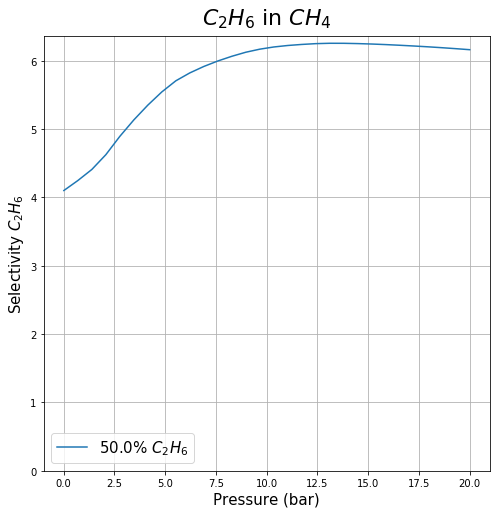

In [7]:
partial_pressures = [0.5, 0.5]
pressure_range = numpy.linspace(0.01, 20, 30)

result_dict = pygaps.iast_binary_svp([isotherms_iast[0], isotherms_iast[1]],
                                    partial_pressures,
                                    pressure_range,
                                    verbose=True,
                                    )
plt.show()

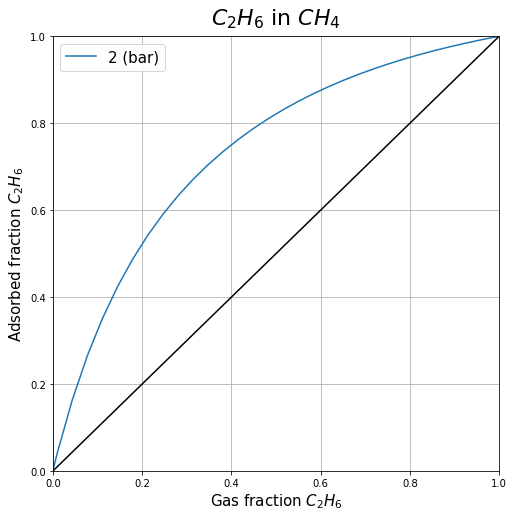

In [8]:
result_dict = pygaps.iast_binary_vle([isotherms_iast[0], 
                                      isotherms_iast[1]], 
                                     2, verbose=True)

plt.show()